In [1]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import os

In [2]:
list_ = []
for name in os.listdir('500GeV_res/csv/'):
    filename = '500GeV_res/csv/' + name
    df = pd.read_csv(filename,delimiter= ' ')
    list_.append(df)

In [3]:
full_dataframe = pd.concat(list_,ignore_index=True)

In [4]:
full_dataframe.head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,tcHW,PT_l1,cHW,PT_j1,PT_j2,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH,xsec
0,-0.673351,102.736816,72.945206,238.734879,76.736488,0.628454,184.967346,0.2,204.490540,-0.03,0.0,0.0,92.214256,-0.081274,315.058563,388.003113,0.173140,-1.424196,892.765808,0.052058
1,-0.493198,109.333550,7.408773,405.588165,45.371407,0.803118,34.531654,0.2,406.100494,-0.03,0.0,0.0,79.441956,0.834684,439.517853,434.344147,0.637087,-1.739697,1001.995300,0.052058
2,-0.571697,121.976952,7.046551,244.286087,181.549393,0.209995,130.104523,0.2,281.383942,-0.03,0.0,0.0,79.047264,0.407068,412.040344,404.999084,0.382768,-1.454996,978.718933,0.052058
3,-0.498543,110.885033,10.763016,330.856171,101.939323,0.469857,95.420158,0.2,340.029114,-0.03,0.0,0.0,91.271538,0.548403,422.558411,426.468262,0.493438,1.736662,979.724060,0.052058
4,0.017520,108.328506,62.694607,388.652740,47.274231,0.799637,56.453419,0.2,436.615021,-0.03,0.0,0.0,93.207039,0.779423,423.673767,486.295135,0.524774,0.852410,930.467407,0.052058


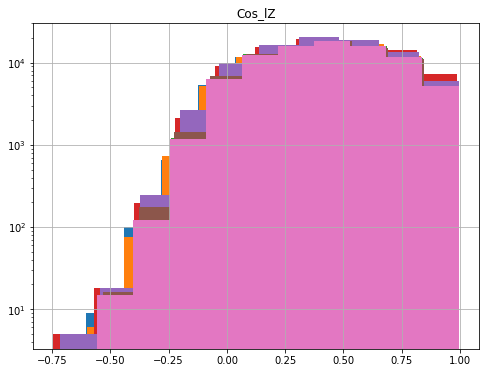

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
full_dataframe.groupby('tcHW').hist(column='Cos_lZ',ax=ax,alpha=0.1,normed=True)
ax.set_yscale('log')
plt.show()

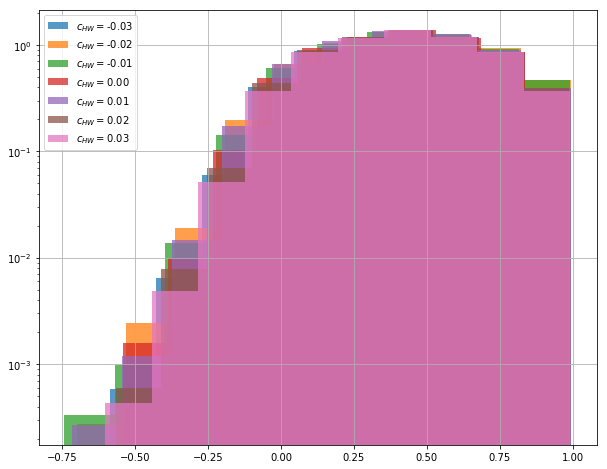

In [6]:
groups = full_dataframe.groupby("cHW")['Cos_lZ']

fig, ax = plt.subplots(figsize=(10,8))

for k, v in groups:
    v.hist(label='$c_{HW}=$%.2f' %(k), alpha=.75, ax=ax,normed=True)

ax.set_yscale('log')    
ax.legend()

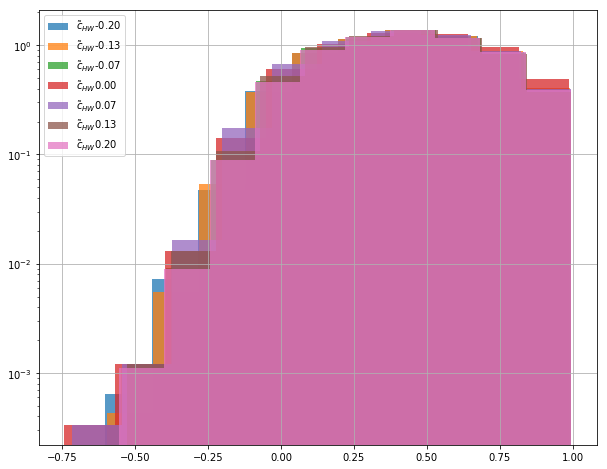

In [50]:
groups = full_dataframe.groupby("tcHW")['Cos_lZ']

fig, ax = plt.subplots(figsize=(10,8))

for k, v in groups:
    v.hist(label='$\~c_{HW}=$%.2f' %(k), alpha=.75, ax=ax,normed=True)

ax.set_yscale('log')    
ax.legend()

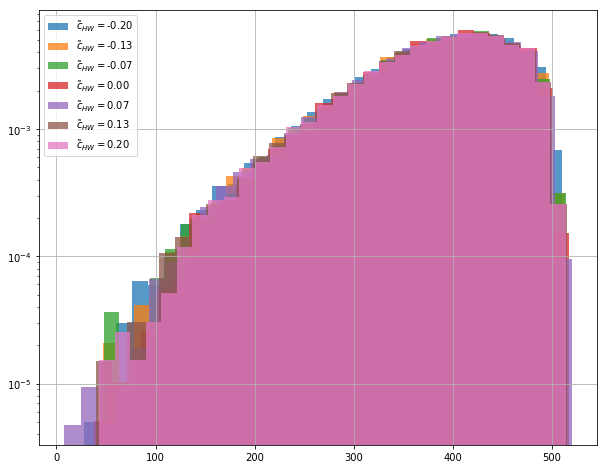

In [7]:
groups = full_dataframe.groupby(["tcHW","cHW"])['PT_H']

fig, ax = plt.subplots(figsize=(10,8))

for k,v in groups:
    if k[0] != 0.0 and k[1] == 0:
        v.hist(label='$\~c_{HW}=$%.2f' %(k[0]), alpha=.75, ax=ax,normed=True,bins=30)
    elif k[0] == 0.0 and k[1] == 0:
        v.hist(label='$\~c_{HW}=$%.2f' %(k[0]), alpha=.75, ax=ax,normed=True,bins=30)
ax.set_yscale('log')    
ax.legend()        

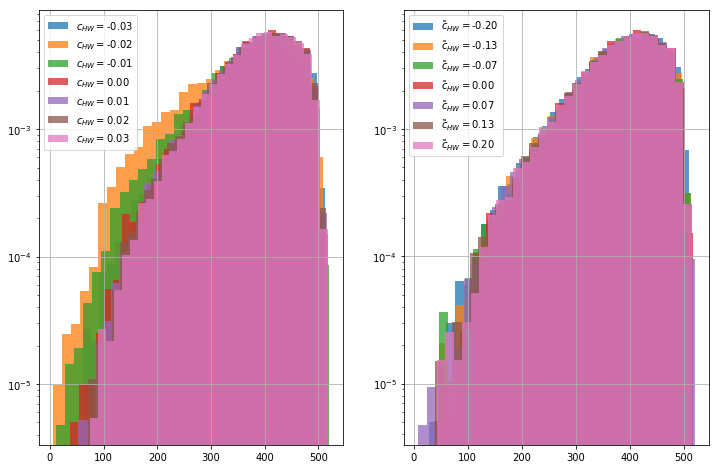

In [32]:
groups = full_dataframe.groupby(["tcHW","cHW"])['PT_H']

fig, ax = plt.subplots(1,2,figsize=(12,8))

for k,v in groups:
    if k[1] != 0.0 and k[0] == 0:
        v.hist(label='$c_{HW}=$%.2f' %(k[1]), alpha=.75, ax=ax[0],normed=True,bins=30)
    elif k[0] != 0.0 and k[1] == 0:
        v.hist(label='$\~c_{HW}=$%.2f' %(k[0]), alpha=.75, ax=ax[1],normed=True,bins=30)
    elif k[1] == 0.0 and k[0] == 0:
        v.hist(label='$c_{HW}=$%.2f' %(k[1]), alpha=.75, ax=ax[0],normed=True,bins=30)
        v.hist(label='$\~c_{HW}=$%.2f' %(k[0]), alpha=.75, ax=ax[1],normed=True,bins=30)        
        
ax[0].set_yscale('log')    
ax[0].legend()  
ax[1].set_yscale('log')    
ax[1].legend()        

In [9]:
bins_dic = {'Eta_H':[20, -6., 6.],
        'PT_b1'   : [30, 0., 300.],
        'PT_b2'   : [15, 0., 150.],
        'PT_H'    : [30, 0., 300.],
        'M_ZH'    : [29, 220., 800.],
        'PT_l1'   : [30, 0., 300.],
        'PT_l2'   : [15, 0., 150.],
        'Cos_lZ'  : [20, -1., 1.],
        'PT_ll'   : [30, 0., 300.],
        'DPHI_ll' : [20, 0., 3.14]}